**IMPLEMENTATION CODE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**MINI PROJECT REVIEW 2**

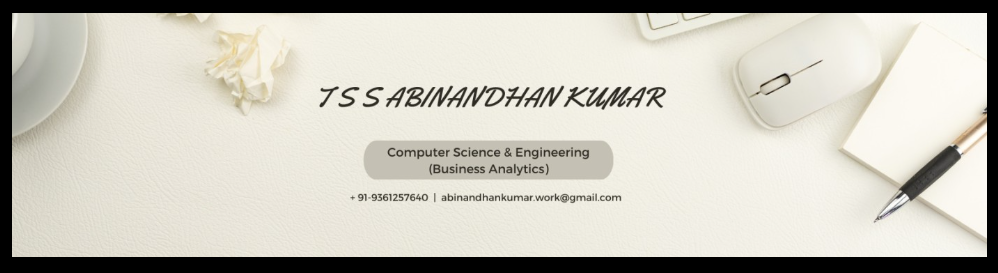

**12 TYPES OF DATA ANALYSIS**

**PROJECT TITLE**

**TACKLING COMPLEX SCIENTIFIC QUESTIONS USING LARGE LANGUAGE MODEL**

**NAME : T S S ABINANDHAN KUMAR**

**REG NO : 19MIA1062**

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import spacy
import re
from sklearn.decomposition import LatentDirichletAllocation


**1. LOAD THE DATA**

In [3]:
#IMPORTING THE DATSETS
data = pd.read_csv('/content/drive/MyDrive/Mini_Project_Datasets/train.csv')
data.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D


**2. DISTRIBUTION OF CORRECT ANSWERS**

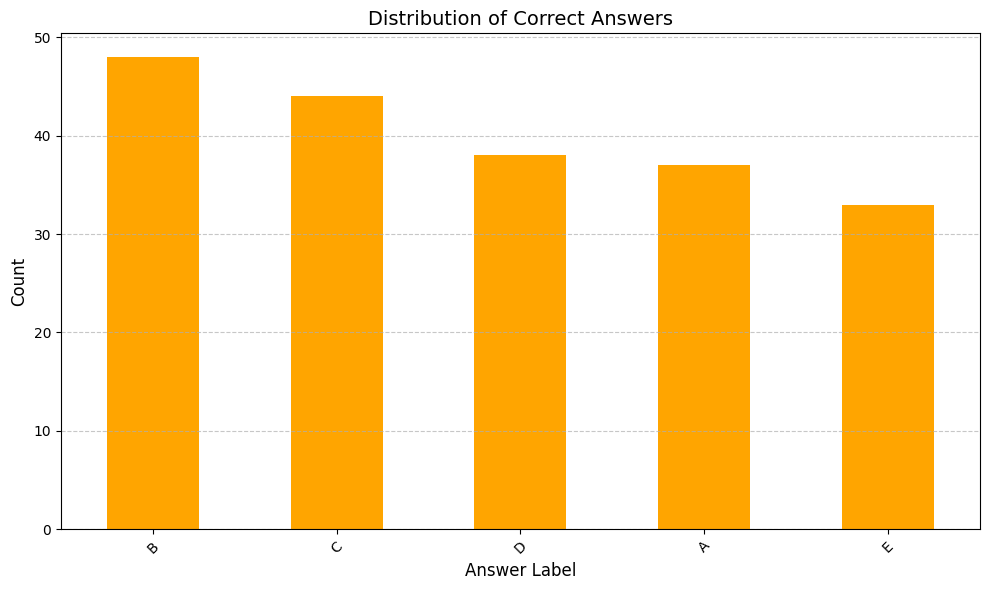

In [4]:
# Count the distribution of correct answers
answer_distribution = data['answer'].value_counts()

# Plot the distribution of correct answers
plt.figure(figsize=(10, 6))  # Increased figure size
answer_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Correct Answers', fontsize=14)  # Changed title font size
plt.xlabel('Answer Label', fontsize=12)  # Changed x-axis label font size
plt.ylabel('Count', fontsize=12)  # Changed y-axis label font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added dashed grid lines with transparency
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [5]:
print(answer_distribution)

B    48
C    44
D    38
A    37
E    33
Name: answer, dtype: int64


**3. LENGTH ANALYSIS**

<ipython-input-6-1fc55dbe1a57>:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[['option_A_length', 'option_B_length', 'option_C_length', 'option_D_length', 'option_E_length']].hist(color='darkblue', bins=30, alpha=0.5, ax=plt.gca())


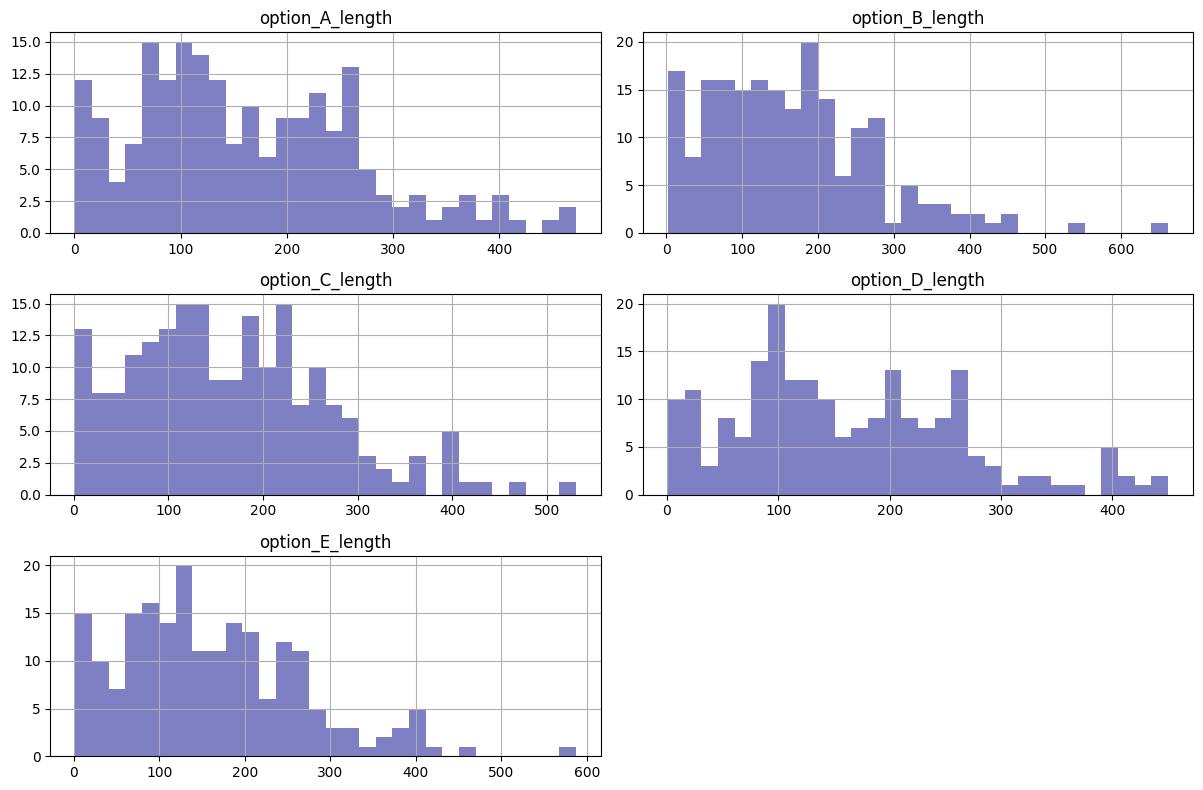

In [6]:
# Calculate the length of the prompts and each option
data['prompt_length'] = data['prompt'].apply(len)
data['option_A_length'] = data['A'].apply(len)
data['option_B_length'] = data['B'].apply(len)
data['option_C_length'] = data['C'].apply(len)
data['option_D_length'] = data['D'].apply(len)
data['option_E_length'] = data['E'].apply(len)

# Plot the distributions of the lengths
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
data['prompt_length'].hist(color='skyblue', bins=30)
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
data[['option_A_length', 'option_B_length', 'option_C_length', 'option_D_length', 'option_E_length']].hist(color='darkblue', bins=30, alpha=0.5, ax=plt.gca())
plt.title('Distribution of Option Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
data.head()

,id,prompt,A,B,C,D,E,answer,prompt_length,option_A_length,option_B_length,option_C_length,option_D_length,option_E_length
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,175,164,199,189,196,192
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,92,285,280,284,288,282
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,107,323,367,363,337,360
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,91,221,219,259,235,211
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,182,243,241,249,239,269


**4. WORD FREQUENCY ANALYSIS**

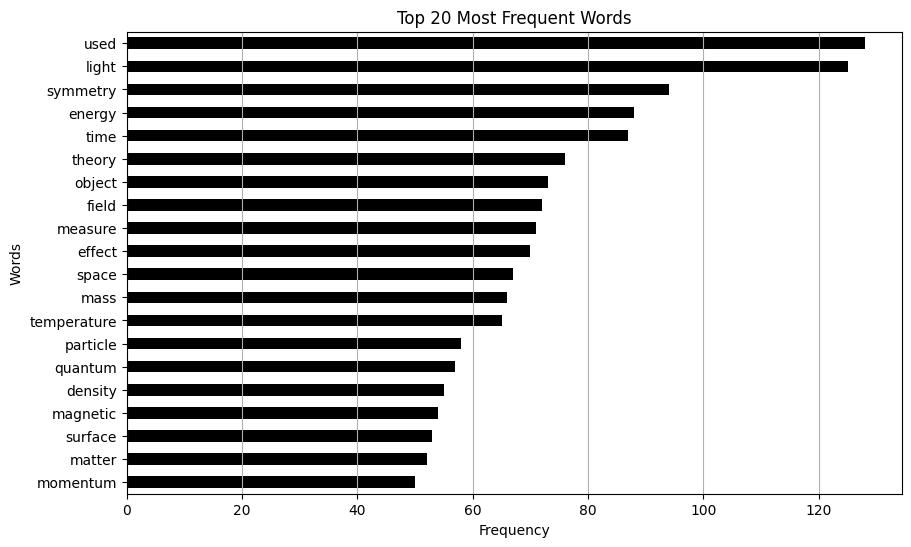

In [8]:
# Combine all text columns to analyze the word frequency
all_text = pd.concat([data['prompt'], data['A'], data['B'], data['C'], data['D'], data['E']])

# Initialize CountVectorizer to count the frequency of words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_count = vectorizer.fit_transform(all_text)

# Create a DataFrame to store the word frequencies
word_count_df = pd.DataFrame(word_count.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the sum of each column to get the total frequency of each word
word_sum = word_count_df.sum()

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
word_sum.sort_values().plot(kind='barh', color='black')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid(axis='x')
plt.show()

**5. TF-IDF Vectorization and Cosine Similarity**

In [9]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Concatenate prompt and options to create a corpus for TF-IDF vectorization
corpus = data.apply(lambda x: x['prompt'] + ' ' + x['A'] + ' ' + x['B'] + ' ' + x['C'] + ' ' + x['D'] + ' ' + x['E'], axis=1)

# Fit the TF-IDF vectorizer on the corpus
tfidf_vectorizer.fit(corpus)

# Define a function to calculate cosine similarity between prompt and options
def calculate_cosine_similarity(row):
    prompt_vector = tfidf_vectorizer.transform([row['prompt']])
    option_vectors = tfidf_vectorizer.transform([row['A'], row['B'], row['C'], row['D'], row['E']])
    similarities = cosine_similarity(prompt_vector, option_vectors)
    return similarities[0]

# Apply the function to calculate cosine similarities
data['cosine_similarities'] = data.apply(calculate_cosine_similarity, axis=1)

# Display the first few rows of the dataframe with cosine similarities
data.head()

,id,prompt,A,B,C,D,E,answer,prompt_length,option_A_length,option_B_length,option_C_length,option_D_length,option_E_length,cosine_similarities
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,175,164,199,189,196,192,"[0.4147375535742851, 0.4755070917728521, 0.411..."
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,92,285,280,284,288,282,"[0.29796130401249327, 0.35789197785879057, 0.3..."
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,107,323,367,363,337,360,"[0.2332120689066719, 0.13746396514632353, 0.27..."
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,91,221,219,259,235,211,"[0.0, 0.2764695148693937, 0.2635371551180724, ..."
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,182,243,241,249,239,269,"[0.6887140281739941, 0.6946839213184298, 0.706..."


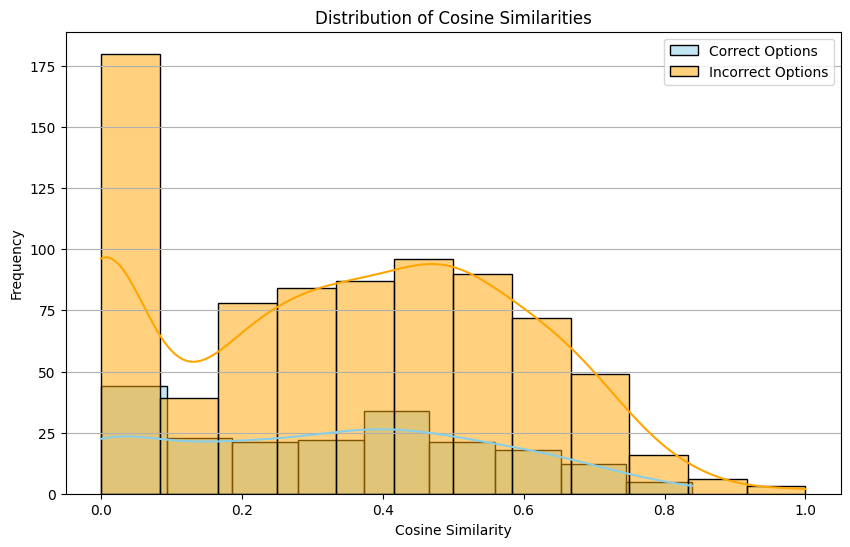

In [10]:
# Function to extract cosine similarity for the correct option
def extract_correct_option_similarity(row):
    answer_index = ord(row['answer']) - ord('A')
    return row['cosine_similarities'][answer_index]

# Function to extract cosine similarities for the incorrect options
def extract_incorrect_option_similarities(row):
    answer_index = ord(row['answer']) - ord('A')
    return [sim for i, sim in enumerate(row['cosine_similarities']) if i != answer_index]

# Apply the functions to extract cosine similarities
data['correct_option_similarity'] = data.apply(extract_correct_option_similarity, axis=1)
data['incorrect_option_similarities'] = data.apply(extract_incorrect_option_similarities, axis=1)

# Create a list of all cosine similarities for correct and incorrect options
correct_option_similarities = data['correct_option_similarity'].tolist()
incorrect_option_similarities = [sim for sims in data['incorrect_option_similarities'] for sim in sims]

# Plot the distributions of cosine similarities
plt.figure(figsize=(10, 6))
sns.histplot(correct_option_similarities, color='skyblue', label='Correct Options', kde=True)
sns.histplot(incorrect_option_similarities, color='orange', label='Incorrect Options', kde=True)
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

**6. N-GRAM ANALYSIS**

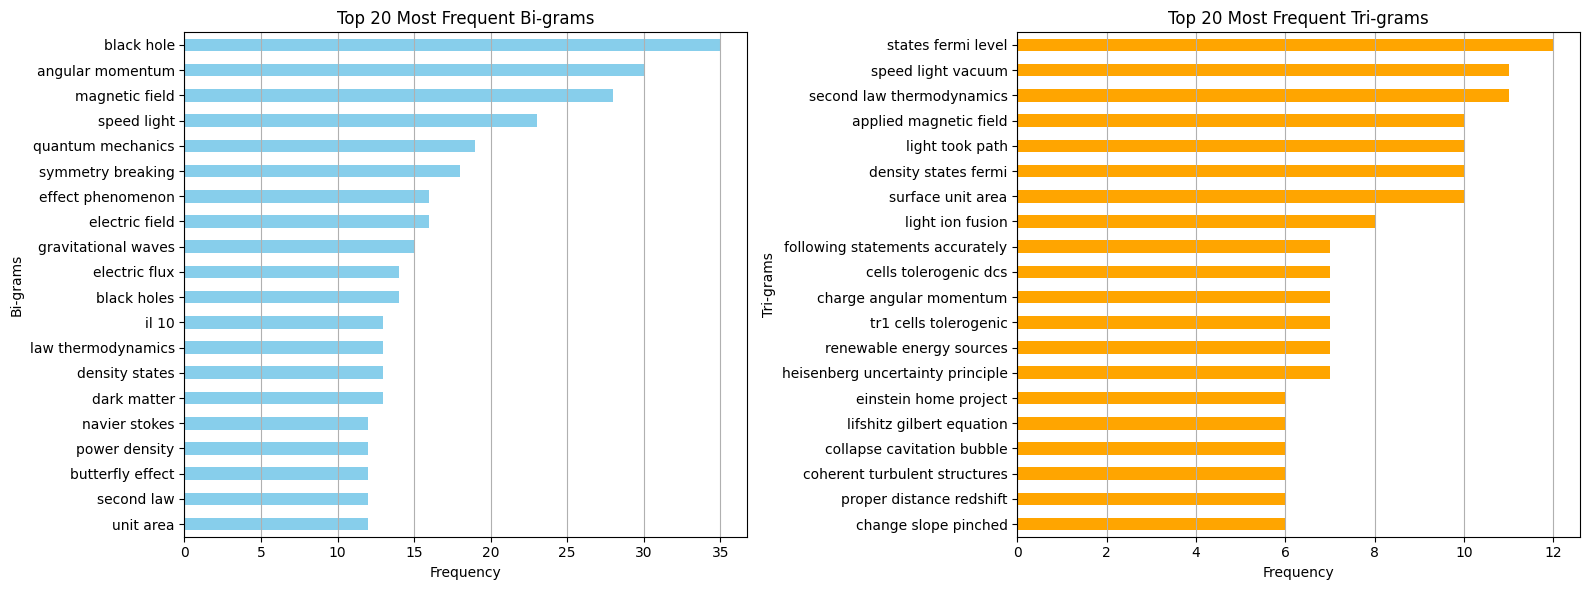

In [11]:
# Initialize CountVectorizer for bi-gram and tri-gram analysis
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=20)

# Fit the vectorizers on the corpus
bigram_count = bigram_vectorizer.fit_transform(all_text)
trigram_count = trigram_vectorizer.fit_transform(all_text)

# Create DataFrames to store the n-gram frequencies
bigram_count_df = pd.DataFrame(bigram_count.toarray(), columns=bigram_vectorizer.get_feature_names_out())
trigram_count_df = pd.DataFrame(trigram_count.toarray(), columns=trigram_vectorizer.get_feature_names_out())

# Calculate the sum of each column to get the total frequency of each n-gram
bigram_sum = bigram_count_df.sum()
trigram_sum = trigram_count_df.sum()

# Plot the top 20 most frequent bi-grams and tri-grams
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

bigram_sum.sort_values().plot(kind='barh', color='skyblue', ax=ax[0])
ax[0].set_title('Top 20 Most Frequent Bi-grams')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Bi-grams')
ax[0].grid(axis='x')

trigram_sum.sort_values().plot(kind='barh', color='orange', ax=ax[1])
ax[1].set_title('Top 20 Most Frequent Tri-grams')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Tri-grams')
ax[1].grid(axis='x')

plt.tight_layout()
plt.show()

**7. SENTIMENTAL ANALYSIS**

In [12]:
# Download the necessary data for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def calculate_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Apply the function to calculate sentiment scores for the prompts and options
data['prompt_sentiment'] = data['prompt'].apply(calculate_sentiment_scores)
data['option_A_sentiment'] = data['A'].apply(calculate_sentiment_scores)
data['option_B_sentiment'] = data['B'].apply(calculate_sentiment_scores)
data['option_C_sentiment'] = data['C'].apply(calculate_sentiment_scores)
data['option_D_sentiment'] = data['D'].apply(calculate_sentiment_scores)
data['option_E_sentiment'] = data['E'].apply(calculate_sentiment_scores)

# Display the first few rows of the dataframe with sentiment scores
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,id,prompt,A,B,C,D,E,answer,prompt_length,option_A_length,...,option_E_length,cosine_similarities,correct_option_similarity,incorrect_option_similarities,prompt_sentiment,option_A_sentiment,option_B_sentiment,option_C_sentiment,option_D_sentiment,option_E_sentiment
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,175,164,...,192,"[0.4147375535742851, 0.4755070917728521, 0.411...",0.497031,"[0.4147375535742851, 0.4755070917728521, 0.411...","{'neg': 0.084, 'neu': 0.837, 'pos': 0.08, 'com...","{'neg': 0.081, 'neu': 0.879, 'pos': 0.04, 'com...","{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...","{'neg': 0.068, 'neu': 0.898, 'pos': 0.034, 'co...","{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...","{'neg': 0.117, 'neu': 0.847, 'pos': 0.036, 'co..."
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,92,285,...,282,"[0.29796130401249327, 0.35789197785879057, 0.3...",0.297961,"[0.35789197785879057, 0.3122091305880347, 0.31...","{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp..."
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,107,323,...,360,"[0.2332120689066719, 0.13746396514632353, 0.27...",0.233212,"[0.13746396514632353, 0.273430157056448, 0.146...","{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...","{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...","{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp...","{'neg': 0.047, 'neu': 0.918, 'pos': 0.035, 'co...","{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...","{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp..."
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,91,221,...,211,"[0.0, 0.2764695148693937, 0.2635371551180724, ...",0.263537,"[0.0, 0.2764695148693937, 0.2652877786694913, ...","{'neg': 0.171, 'neu': 0.696, 'pos': 0.133, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.071, 'neu': 0.873, 'pos': 0.056, 'co...","{'neg': 0.064, 'neu': 0.835, 'pos': 0.1, 'comp...","{'neg': 0.073, 'neu': 0.87, 'pos': 0.057, 'com...","{'neg': 0.077, 'neu': 0.802, 'pos': 0.12, 'com..."
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,182,243,...,269,"[0.6887140281739941, 0.6946839213184298, 0.706...",0.694294,"[0.6887140281739941, 0.6946839213184298, 0.706...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


**8. NAMED ENTITY RECOGNITION ANALYSIS**

In [13]:
# Load the spaCy model for named entity recognition (NER)
nlp = spacy.load('en_core_web_sm')

# Define a function to perform named entity recognition and extract entity labels
def extract_entity_labels(text):
    doc = nlp(text)
    entity_labels = [ent.label_ for ent in doc.ents]
    return entity_labels

# Apply the function to extract entity labels for the prompts and options
data['prompt_entity_labels'] = data['prompt'].apply(extract_entity_labels)
data['option_A_entity_labels'] = data['A'].apply(extract_entity_labels)
data['option_B_entity_labels'] = data['B'].apply(extract_entity_labels)
data['option_C_entity_labels'] = data['C'].apply(extract_entity_labels)
data['option_D_entity_labels'] = data['D'].apply(extract_entity_labels)
data['option_E_entity_labels'] = data['E'].apply(extract_entity_labels)

# Display the first few rows of the dataframe with entity labels
data.head()

,id,prompt,A,B,C,D,E,answer,prompt_length,option_A_length,...,option_B_sentiment,option_C_sentiment,option_D_sentiment,option_E_sentiment,prompt_entity_labels,option_A_entity_labels,option_B_entity_labels,option_C_entity_labels,option_D_entity_labels,option_E_entity_labels
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,175,164,...,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...","{'neg': 0.068, 'neu': 0.898, 'pos': 0.034, 'co...","{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...","{'neg': 0.117, 'neu': 0.847, 'pos': 0.036, 'co...",[ORG],[],"[CARDINAL, CARDINAL]",[],"[CARDINAL, CARDINAL]",[]
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,92,285,...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",[],[],[],[],[],[]
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,107,323,...,"{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp...","{'neg': 0.047, 'neu': 0.918, 'pos': 0.035, 'co...","{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...","{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",[],"[GPE, NORP, GPE, GPE, CARDINAL, PERSON, NORP, ...","[CARDINAL, GPE, GPE, NORP, GPE, CARDINAL, PERSON]","[GPE, NORP, GPE, GPE, PERSON, CARDINAL, PERSON...","[CARDINAL, GPE, GPE, PERSON, NORP, NORP]","[NORP, ORG, GPE, NORP, GPE, GPE, PERSON, NORP,..."
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,91,221,...,"{'neg': 0.071, 'neu': 0.873, 'pos': 0.056, 'co...","{'neg': 0.064, 'neu': 0.835, 'pos': 0.1, 'comp...","{'neg': 0.073, 'neu': 0.87, 'pos': 0.057, 'com...","{'neg': 0.077, 'neu': 0.802, 'pos': 0.12, 'com...",[],[],[],[],[],[]
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,182,243,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",[],[],[],[],[],[]


**9. LEXICON DIVERSITY ANALYSIS**

In [14]:
# Define a function to calculate lexical diversity
def lexical_diversity(text):
    tokens = text.split()
    unique_tokens = set(tokens)
    lex_div = len(unique_tokens) / len(tokens) if tokens else 0
    return lex_div

# Apply the function to calculate lexical diversity for the prompts and options
data['prompt_lexical_diversity'] = data['prompt'].apply(lexical_diversity)
data['option_A_lexical_diversity'] = data['A'].apply(lexical_diversity)
data['option_B_lexical_diversity'] = data['B'].apply(lexical_diversity)
data['option_C_lexical_diversity'] = data['C'].apply(lexical_diversity)
data['option_D_lexical_diversity'] = data['D'].apply(lexical_diversity)
data['option_E_lexical_diversity'] = data['E'].apply(lexical_diversity)

# Display the first few rows of the dataframe with lexical diversity values
data[['prompt_lexical_diversity', 'option_A_lexical_diversity', 'option_B_lexical_diversity', 'option_C_lexical_diversity', 'option_D_lexical_diversity', 'option_E_lexical_diversity']].head()

,prompt_lexical_diversity,option_A_lexical_diversity,option_B_lexical_diversity,option_C_lexical_diversity,option_D_lexical_diversity,option_E_lexical_diversity
0,0.875000,0.892857,0.823529,0.781250,0.823529,0.870968
1,0.928571,0.837209,0.837209,0.837209,0.837209,0.837209
2,0.800000,0.796296,0.758065,0.762712,0.818182,0.771930
3,0.846154,1.000000,0.888889,0.833333,0.833333,0.939394
4,0.769231,0.714286,0.714286,0.675000,0.714286,0.700000


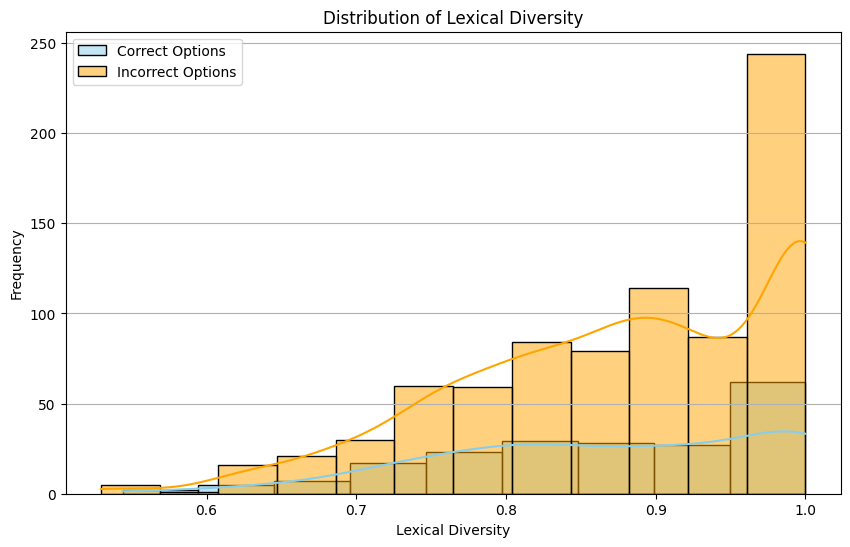

In [15]:
# Function to extract lexical diversity for the correct option
def extract_correct_option_lexical_diversity(row):
    answer_index = ord(row['answer']) - ord('A')
    lexical_diversity_values = [
        row['option_A_lexical_diversity'],
        row['option_B_lexical_diversity'],
        row['option_C_lexical_diversity'],
        row['option_D_lexical_diversity'],
        row['option_E_lexical_diversity']
    ]
    return lexical_diversity_values[answer_index]

# Function to extract lexical diversity for the incorrect options
def extract_incorrect_option_lexical_diversity(row):
    answer_index = ord(row['answer']) - ord('A')
    lexical_diversity_values = [
        row['option_A_lexical_diversity'],
        row['option_B_lexical_diversity'],
        row['option_C_lexical_diversity'],
        row['option_D_lexical_diversity'],
        row['option_E_lexical_diversity']
    ]
    return [lex_div for i, lex_div in enumerate(lexical_diversity_values) if i != answer_index]

# Apply the functions to extract lexical diversity values
data['correct_option_lexical_diversity'] = data.apply(extract_correct_option_lexical_diversity, axis=1)
data['incorrect_option_lexical_diversity'] = data.apply(extract_incorrect_option_lexical_diversity, axis=1)

# Create a list of all lexical diversity values for correct and incorrect options
correct_option_lexical_diversity = data['correct_option_lexical_diversity'].tolist()
incorrect_option_lexical_diversity = [lex_div for lex_divs in data['incorrect_option_lexical_diversity'] for lex_div in lex_divs]

# Plot the distributions of lexical diversity values
plt.figure(figsize=(10, 6))
sns.histplot(correct_option_lexical_diversity, color='skyblue', label='Correct Options', kde=True)
sns.histplot(incorrect_option_lexical_diversity, color='orange', label='Incorrect Options', kde=True)
plt.title('Distribution of Lexical Diversity')
plt.xlabel('Lexical Diversity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

**10. Part-of-Speech Analysis**

In [16]:
# Load the spaCy model for POS tagging
nlp = spacy.load('en_core_web_sm')

# Define a function to perform POS tagging and extract POS frequencies
def extract_pos_frequencies(text):
    doc = nlp(text)
    pos_frequencies = dict()
    for token in doc:
        pos_frequencies[token.pos_] = pos_frequencies.get(token.pos_, 0) + 1
    return pos_frequencies

# Apply the function to extract POS frequencies for the prompts and options
data['prompt_pos_frequencies'] = data['prompt'].apply(extract_pos_frequencies)
data['option_A_pos_frequencies'] = data['A'].apply(extract_pos_frequencies)
data['option_B_pos_frequencies'] = data['B'].apply(extract_pos_frequencies)
data['option_C_pos_frequencies'] = data['C'].apply(extract_pos_frequencies)
data['option_D_pos_frequencies'] = data['D'].apply(extract_pos_frequencies)
data['option_E_pos_frequencies'] = data['E'].apply(extract_pos_frequencies)

# Display the first few rows of the dataframe with POS frequencies
data[['prompt_pos_frequencies', 'option_A_pos_frequencies', 'option_B_pos_frequencies', 'option_C_pos_frequencies', 'option_D_pos_frequencies', 'option_E_pos_frequencies']].head()

,prompt_pos_frequencies,option_A_pos_frequencies,option_B_pos_frequencies,option_C_pos_frequencies,option_D_pos_frequencies,option_E_pos_frequencies
0,"{'PRON': 1, 'ADP': 4, 'DET': 3, 'VERB': 3, 'NO...","{'NOUN': 9, 'AUX': 1, 'DET': 4, 'PRON': 1, 'VE...","{'NOUN': 10, 'AUX': 1, 'DET': 6, 'PRON': 1, 'V...","{'NOUN': 10, 'AUX': 3, 'DET': 4, 'PRON': 2, 'V...","{'NOUN': 10, 'AUX': 1, 'DET': 6, 'PRON': 1, 'V...","{'NOUN': 9, 'AUX': 2, 'DET': 4, 'PRON': 2, 'VE..."
1,"{'PRON': 1, 'ADP': 3, 'DET': 2, 'NOUN': 5, 'AU...","{'ADJ': 6, 'NOUN': 15, 'VERB': 6, 'ADP': 8, 'D...","{'ADJ': 7, 'NOUN': 16, 'VERB': 5, 'ADP': 8, 'D...","{'ADJ': 7, 'NOUN': 14, 'VERB': 5, 'ADP': 8, 'D...","{'ADJ': 7, 'NOUN': 16, 'VERB': 5, 'ADP': 8, 'D...","{'ADJ': 7, 'NOUN': 14, 'VERB': 5, 'ADP': 8, 'D..."
2,"{'PRON': 1, 'ADP': 2, 'DET': 3, 'VERB': 2, 'NO...","{'DET': 9, 'NOUN': 13, 'AUX': 3, 'VERB': 6, 'A...","{'DET': 10, 'NOUN': 17, 'AUX': 3, 'ADP': 12, '...","{'DET': 12, 'NOUN': 15, 'AUX': 1, 'ADP': 9, 'A...","{'DET': 7, 'NOUN': 15, 'VERB': 5, 'NUM': 1, 'A...","{'DET': 11, 'NOUN': 14, 'AUX': 2, 'ADP': 10, '..."
3,"{'PRON': 1, 'AUX': 1, 'DET': 1, 'NOUN': 6, 'AD...","{'VERB': 5, 'DET': 3, 'NOUN': 8, 'PUNCT': 3, '...","{'VERB': 3, 'DET': 6, 'NOUN': 11, 'PUNCT': 3, ...","{'VERB': 4, 'DET': 8, 'NOUN': 12, 'PUNCT': 3, ...","{'VERB': 4, 'DET': 6, 'NOUN': 10, 'PUNCT': 3, ...","{'VERB': 4, 'DET': 6, 'NOUN': 9, 'PUNCT': 3, '..."
4,"{'PRON': 1, 'ADP': 5, 'DET': 6, 'VERB': 3, 'NO...","{'DET': 7, 'ADJ': 4, 'NOUN': 10, 'ADP': 4, 'AU...","{'DET': 7, 'ADJ': 4, 'NOUN': 10, 'ADP': 4, 'AU...","{'DET': 8, 'ADJ': 5, 'NOUN': 10, 'ADP': 4, 'AU...","{'DET': 7, 'ADJ': 4, 'NOUN': 10, 'ADP': 4, 'AU...","{'DET': 8, 'ADJ': 5, 'NOUN': 11, 'ADP': 5, 'AU..."


**11. Syntactic Analysis**

In [17]:
# Define a function to categorize sentence types
def categorize_sentence_type(text):
    if text.endswith('?'):
        return 'Interrogative'
    elif text.endswith('!'):
        return 'Exclamatory'
    else:
        return 'Declarative'

# Apply the function to categorize sentence types for the prompts and options
data['prompt_sentence_type'] = data['prompt'].apply(categorize_sentence_type)
data['option_A_sentence_type'] = data['A'].apply(categorize_sentence_type)
data['option_B_sentence_type'] = data['B'].apply(categorize_sentence_type)
data['option_C_sentence_type'] = data['C'].apply(categorize_sentence_type)
data['option_D_sentence_type'] = data['D'].apply(categorize_sentence_type)
data['option_E_sentence_type'] = data['E'].apply(categorize_sentence_type)

# Display the first few rows of the dataframe with sentence types
data[['prompt_sentence_type', 'option_A_sentence_type', 'option_B_sentence_type', 'option_C_sentence_type', 'option_D_sentence_type', 'option_E_sentence_type']].head()

,prompt_sentence_type,option_A_sentence_type,option_B_sentence_type,option_C_sentence_type,option_D_sentence_type,option_E_sentence_type
0,Interrogative,Declarative,Declarative,Declarative,Declarative,Declarative
1,Interrogative,Declarative,Declarative,Declarative,Declarative,Declarative
2,Interrogative,Declarative,Declarative,Declarative,Declarative,Declarative
3,Interrogative,Declarative,Declarative,Declarative,Declarative,Declarative
4,Interrogative,Declarative,Declarative,Declarative,Declarative,Declarative


**12. Topic Modeling**

In [18]:
# Combine all texts (prompts and options) into a single list
all_texts = data['prompt'].tolist() + data['A'].tolist() + data['B'].tolist() + data['C'].tolist() + data['D'].tolist() + data['E'].tolist()

# Step 1: Data Preparation - Cleaning and Tokenizing the Text
# (Note: We have already cleaned the text previously, so we can move to the next step)

# Step 2: Feature Extraction - Using Count Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(all_texts)

# Step 3: Model Training - Training the LDA Model
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(dtm)

# Step 4: Topic Analysis - Getting the Top Words for Each Topic
topic_words = {}
n_top_words = 10
for topic, comp in enumerate(lda_model.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    topic_words[topic] = [vectorizer.get_feature_names_out()[i] for i in word_idx]

topic_words

{0: ['light',
  'wave',
  'distance',
  'redshift',
  '10',
  'used',
  'temperature',
  'fusion',
  'signal',
  'waves'],
 1: ['light',
  'black',
  'force',
  'theory',
  'time',
  'emission',
  'hole',
  'second',
  'resistance',
  'mass'],
 2: ['symmetry',
  'theory',
  'used',
  'effect',
  'breaking',
  'earth',
  'physics',
  'reciprocal',
  'relationship',
  'length'],
 3: ['energy',
  'surface',
  'rotation',
  'temperature',
  'particles',
  'particle',
  'electric',
  'field',
  'power',
  'momentum'],
 4: ['used',
  'object',
  'measure',
  'magnetic',
  'field',
  'material',
  'water',
  'properties',
  'space',
  'liquid']}

In [21]:
def generate_prompt(row):
    return row['prompt']


def get_answer(prompt):
    return data[data['prompt'] == prompt]['answer'].values[0]

def get_options(prompt):
    row = data[data['prompt'] == prompt].iloc[0]
    return [row['A'], row['B'], row['C'], row['D'], row['E']]


prompt = input()
options = get_options(prompt)

print(f"Prompt: {prompt}")
print(f"Options:")
for i, option in enumerate(options):
    print(f"{chr(65+i)}. {option}")
print(f"Answer: {get_answer(prompt)}")

Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?
Prompt: Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?
Options:
A. MOND is a theory that reduces the observed missing baryonic mass in galaxy clusters by postulating the existence of a new form of matter called "fuzzy dark matter."
B. MOND is a theory that increases the discrepancy between the observed missing baryonic mass in galaxy clusters and the measured velocity dispersions from a factor of around 10 to a factor of about 20.
C. MOND is a theory that explains the missing baryonic mass in galaxy clusters that was previously considered dark matter by demonstrating that the mass is in the form of neutrinos and axions.
D. MOND is a theory that reduces the discrepancy between the observ